In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fct_velocity(x, latency, tau, steady_state) :

    time = x
    velocity = []
    maxi = steady_state
    for t in range(len(time)) :

        if time[t] < latency :
            velocity.append(0)
        else :
            velocity.append(maxi*(1-np.exp(-1/tau*(time[t]-latency))))

    return velocity


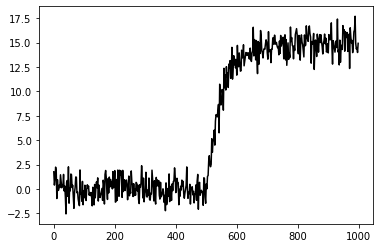

In [3]:
x = np.asarray(range(0, 1000, 2))
latency = 500
tau = 50
steady_state = 15
np.random.seed(0)

velo = fct_velocity(x, latency, tau, steady_state)
velo += 1*np.random.randn(x.size)

plt.plot(x, velo, 'k');

In [4]:
param_fit = [{'name':'steady_state', 'value':12,  'min':5.,  'max':40.},
             {'name':'latency',      'value':500, 'min':100, 'max':700},
             {'name':'tau',          'value':15., 'min':13., 'max':80.}]

inde_vars = {'x': x}

from lmfit import  Model, Parameters

equation = fct_velocity

params = Parameters()
model = Model(equation, independent_vars=inde_vars.keys())

for num_par in range(len(param_fit)) :
    params.add(param_fit[num_par]['name'],
               value = param_fit[num_par]['value'],
               min   = param_fit[num_par]['min'],
               max   = param_fit[num_par]['max'])

result_deg = model.fit(velo, params, nan_policy='omit', **inde_vars)


In [5]:
result_deg

In [6]:
result_deg.values['latency']

501.5071932702322

# NaN

In [7]:
N_test = 200

std_lat = []
for y1 in range(0, 500, 20) :
    
    y2 = y1+40
    
    velo = fct_velocity(x, latency, tau, steady_state)
    velo += 1*np.random.randn(x.size)
    
    velo[y1:y2] = np.nan
    
    Lats = []
    for i_test in range(N_test):
        

        for num_par in range(len(param_fit)) :
            if param_fit[num_par]['name'] == 'latency' :
                val = param_fit[num_par]['value']+100*np.random.randn()
            else :
                val = param_fit[num_par]['value']
            params.add(param_fit[num_par]['name'],
                       value =  val,
                       min   = param_fit[num_par]['min'],
                       max   = param_fit[num_par]['max'])

        result_deg = model.fit(velo, params, nan_policy='omit', **inde_vars)
        Lats.append(result_deg.values['latency'])
        
    std_lat.append(np.std(Lats))
    print(f'y[{y1*2}, {y2*2}] = {np.mean(Lats):.2f} +/- {np.std(Lats):.2f} (ms)')

y[0, 80] = 499.17 +/- 0.01 (ms)
y[40, 120] = 501.97 +/- 14.68 (ms)
y[80, 160] = 502.61 +/- 0.57 (ms)
y[120, 200] = 501.60 +/- 13.60 (ms)
y[160, 240] = 500.07 +/- 0.01 (ms)
y[200, 280] = 505.42 +/- 27.47 (ms)
y[240, 320] = 494.70 +/- 18.64 (ms)
y[280, 360] = 499.18 +/- 6.52 (ms)
y[320, 400] = 500.11 +/- 0.22 (ms)
y[360, 440] = 499.24 +/- 8.48 (ms)
y[400, 480] = 499.39 +/- 0.92 (ms)
y[440, 520] = 507.47 +/- 12.24 (ms)
y[480, 560] = 487.68 +/- 33.80 (ms)
y[520, 600] = 500.17 +/- 2.05 (ms)
y[560, 640] = 499.99 +/- 0.06 (ms)
y[600, 680] = 498.86 +/- 0.01 (ms)
y[640, 720] = 503.19 +/- 9.10 (ms)
y[680, 760] = 501.19 +/- 0.33 (ms)
y[720, 800] = 501.29 +/- 0.07 (ms)
y[760, 840] = 498.47 +/- 0.78 (ms)
y[800, 880] = 500.44 +/- 0.00 (ms)
y[840, 920] = 501.59 +/- 0.11 (ms)
y[880, 960] = 500.72 +/- 9.62 (ms)
y[920, 1000] = 496.99 +/- 12.94 (ms)
y[960, 1040] = 501.70 +/- 17.12 (ms)


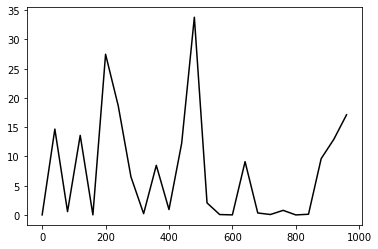

In [8]:
plt.plot(range(0, 1000, 40), std_lat, 'k');

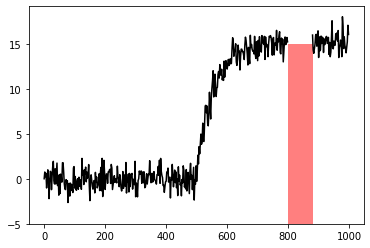

In [9]:
y1=int(800/2)
y2 = y1+40
    
velo = fct_velocity(x, latency, tau, steady_state)
velo += 1*np.random.randn(x.size)
velo[y1:y2] = np.nan

plt.bar(800, 20, width=80, color='r', bottom=-5, align='edge', alpha=.5)
plt.plot(x, velo, 'k');

In [21]:
result_deg.params   , result_deg.covar[1, 1]

(Parameters([('steady_state',
              <Parameter 'steady_state', value=14.974691473466107 +/- 0.0818, bounds=[5.0:40.0]>),
             ('latency',
              <Parameter 'latency', value=501.213000914673 +/- 1.34, bounds=[100:700]>),
             ('tau',
              <Parameter 'tau', value=48.290519490686776 +/- 2.14, bounds=[13.0:80.0]>)]),
 1.796011242882347)

In [22]:
N_test = 200

std_lat, covars = [], []
for y1 in range(0, 500, 20) :
    
    velo = fct_velocity(x, latency, tau, steady_state)
    velo += 1*np.random.randn(x.size)
    
    y2 = y1+40
    velo[y1:y2] = np.nan
    
    Lats, covars_ = [], []
    for i_test in range(N_test):
        

        for num_par in range(len(param_fit)) :
            
            if param_fit[num_par]['name'] == 'latency' :
                val = param_fit[num_par]['value']+np.random.choice([1, -1])*100*np.random.rand()
            else :
                val = param_fit[num_par]['value']
            
            params.add(param_fit[num_par]['name'],
                       value = val,
                       min   = param_fit[num_par]['min'],
                       max   = param_fit[num_par]['max'])

        result_deg = model.fit(velo, params, nan_policy='omit', **inde_vars)
        Lats.append(result_deg.values['latency'])
        covars_.append(result_deg.covar[1, 1])
        
    covars.append(np.mean(covars_))
    std_lat.append(np.std(Lats))
    print(f'y[{y1*2}, {y2*2}] = {np.mean(Lats):.2f} +/- {np.std(Lats):.2f} (ms); covar = {np.mean(covars_):.2f} +/- {np.std(covars_):.2f} ')

y[0, 80] = 502.00 +/- 0.00 (ms) 1.94 
y[40, 120] = 496.77 +/- 0.00 (ms) 2.05 
y[80, 160] = 500.00 +/- 0.00 (ms) 1.95 
y[120, 200] = 500.91 +/- 0.00 (ms) 1.87 
y[160, 240] = 500.01 +/- 0.00 (ms) 2.10 
y[200, 280] = 500.00 +/- 0.00 (ms) 1.77 
y[240, 320] = 499.16 +/- 0.00 (ms) 1.65 
y[280, 360] = 501.52 +/- 0.00 (ms) 1.53 
y[320, 400] = 497.96 +/- 0.13 (ms) 1.86 
y[360, 440] = 500.58 +/- 0.00 (ms) 1.96 
y[400, 480] = 500.45 +/- 0.00 (ms) 1.70 
y[440, 520] = 498.64 +/- 0.00 (ms) 9.44 
y[480, 560] = 485.67 +/- 7.62 (ms) 116.88 
y[520, 600] = 502.86 +/- 0.00 (ms) 2.20 
y[560, 640] = 508.11 +/- 26.19 (ms) 212.15 
y[600, 680] = 501.63 +/- 0.00 (ms) 1.95 
y[640, 720] = 499.08 +/- 0.00 (ms) 2.05 
y[680, 760] = 500.00 +/- 0.00 (ms) 1.95 
y[720, 800] = 500.00 +/- 0.00 (ms) 1.73 
y[760, 840] = 501.86 +/- 0.00 (ms) 1.69 
y[800, 880] = 500.12 +/- 0.00 (ms) 2.14 
y[840, 920] = 500.21 +/- 0.00 (ms) 2.19 
y[880, 960] = 499.81 +/- 0.45 (ms) 1.88 
y[920, 1000] = 498.17 +/- 0.00 (ms) 2.21 
y[960, 1040] = 

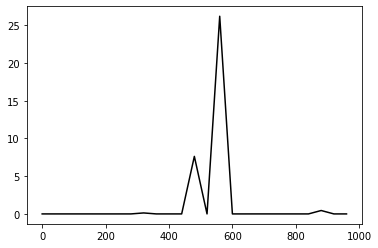

In [23]:
plt.plot(range(0, 1000, 40), std_lat, 'k');

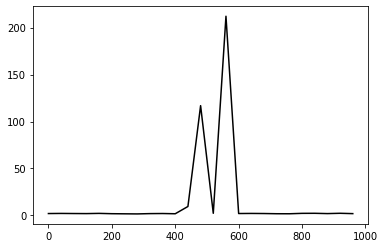

In [24]:
plt.plot(range(0, 1000, 40), covars, 'k');

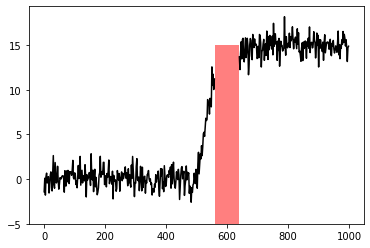

In [12]:
y1=int(560/2)
y2 = y1+40
    
velo = fct_velocity(x, latency, tau, steady_state)
velo += 1*np.random.randn(x.size)
velo[y1:y2] = np.nan

plt.bar(560, 20, width=80, color='r', bottom=-5, align='edge', alpha=.5)
plt.plot(x, velo, 'k');